In [2]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
import sys
import seaborn as sns
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle

import cmocean as cm
from dask.diagnostics import ProgressBar
# warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [4]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

In [6]:
chunks_new={'time_counter':10}


path='/data/pacific/lrenault/SASI/FULL/WRF/'
listmw=glob(path+'wrf_*.nc');listmw.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varfw=xr.open_mfdataset(listmw[::2][-7:],chunks=chunks_new)

path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listtw=glob(path+'wrf_*.nc');listtw.sort()
#vart=xr.open_dataset(listt[xmon])
vartw=xr.open_mfdataset(listtw[::2][-7:],chunks=chunks_new)

In [69]:
import datetime

# t_ind=pd.DatetimeIndex(varf.time_counter.compute())
t_ind=varf.time_counter.groupby("time_counter.dayofyear").mean()
t_ind_h=varf.time_counter


In [29]:
tf=varf.temp.groupby("time_counter.dayofyear").mean()
tf=tf.compute();

tt=vart.temp.groupby("time_counter.dayofyear").mean()
tt=tt.compute();

In [24]:
sf=varf.salt.groupby("time_counter.dayofyear").mean()
sf=sf.compute();


st=vart.salt.groupby("time_counter.dayofyear").mean()
st=st.compute();

In [25]:
rain_f=varfw.RAIN.groupby("time_counter.dayofyear").mean()
rain_f=rain_f.compute();


rain_t=vartw.RAIN.groupby("time_counter.dayofyear").mean()
rain_t=rain_t.compute();

In [26]:
LH_f=varfw.LH.groupby("time_counter.dayofyear").mean()
LH_f=LH_f.compute()

LH_t=vartw.LH.groupby("time_counter.dayofyear").mean()
LH_t=LH_t.compute()

In [10]:
# %%time
# uf=varf.u.sel(time_counter=slice("2012-05-01","2012-05-31"))#.groupby("time_counter.dayofyear").mean()
# uf=uf.chunk(chunks=chunks_new);
# # u_f=(uf[:,1:,:]+uf[:,:-1,:])/2
# uf=uf.compute();


# vf=varf.v.sel(time_counter=slice("2012-05-01","2012-05-31"))#.groupby("time_counter.dayofyear").mean()
# vf=vf.chunk(chunks=chunks_new);
# # vf=(vf[:,:,1:]+vf[:,:,:-1])/2
# vf=vf.compute();



In [11]:
# uf,vf,_=romspickle.uvw2rho_3d(uf,vf,uf)
# ut,vt,_=romspickle.uvw2rho_3d(ut,vt,ut)


In [14]:
# for ixx in range(tf.shape[0]):


#     fig,ax=plt.subplots(2,2,figsize=(10,8))
#     ax=ax.ravel()
#     cc1=ax[0].contourf(tf.nav_lon_rho,tf.nav_lat_rho,tf[ixx],cmap='jet',levels=np.linspace(9,13.5,75),extend='both')
#     dec=40
#     ax[0].quiver(tf.nav_lon_rho[1:-1,1:-1][::dec,::dec],tf.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

#     ax[0].set_xlim(-126.5,-122)
#     ax[0].set_ylim(36.5,39)
#     cb1=fig.colorbar(cc1, ax=ax[0])
#     cb1.set_ticks([9,10,11,12,13])
#     ax[0].set_title(r'T',fontsize=15)



#     cc2=ax[1].contourf(sf.nav_lon_rho,sf.nav_lat_rho,sf[ixx],cmap='inferno',levels=np.linspace(32.3,34,75),extend='both')
#     ax[1].quiver(sf.nav_lon_rho[1:-1,1:-1][::dec,::dec],sf.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

#     ax[1].set_xlim(-126.5,-122)
#     ax[1].set_ylim(36.5,39)
#     cb2=fig.colorbar(cc2, ax=ax[1])
#     cb2.set_ticks([32.5,33,33.5,34])
#     ax[1].set_title(r'S',fontsize=15)






#     cc3=ax[2].contourf(rho_f.nav_lon_rho,rho_f.nav_lat_rho,rho_f[ixx]-1000,cmap='rainbow',levels=np.linspace(24.5,26.5,75),extend='both')
#     ax[2].quiver(rho_f.nav_lon_rho[1:-1,1:-1][::dec,::dec],rho_f.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

#     ax[2].set_xlim(-126.5,-122)
#     ax[2].set_ylim(36.5,39)
#     cb3=fig.colorbar(cc3, ax=ax[2])
#     cb3.set_ticks([24.5,25.5,26.5])
#     ax[2].set_title(r'$\sigma_0$',fontsize=15)




#     cc4=ax[3].contourf(rho_f.nav_lon_rho[1:-1,1:-1],rho_f.nav_lat_rho[1:-1,1:-1],np.sqrt(uf.data[ixx]**2+vf.data[ixx]**2),cmap=cm.cm.speed,levels=np.linspace(0,1,75),extend='both')
#     ax[3].quiver(rho_f.nav_lon_rho[1:-1,1:-1][::dec,::dec],rho_f.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

#     ax[3].set_xlim(-126.5,-122)
#     ax[3].set_ylim(36.5,39)
#     cb4=fig.colorbar(cc4, ax=ax[3])
#     cb4.set_ticks([0,0.5,1])
#     ax[3].set_title(r'$|U|$',fontsize=15)



#     ax[0].text(-126,39.4,'{0}'.format(t_ind_h[ixx].data),fontsize=10)
#     plt.tight_layout()

#     plt.savefig('/homes/metogra/iufarias/Documents/figures/smode_help/maps_{0:03}.png'.format(ixx))
#     plt.close()

IndexError: index 213 is out of bounds for axis 0 with size 213

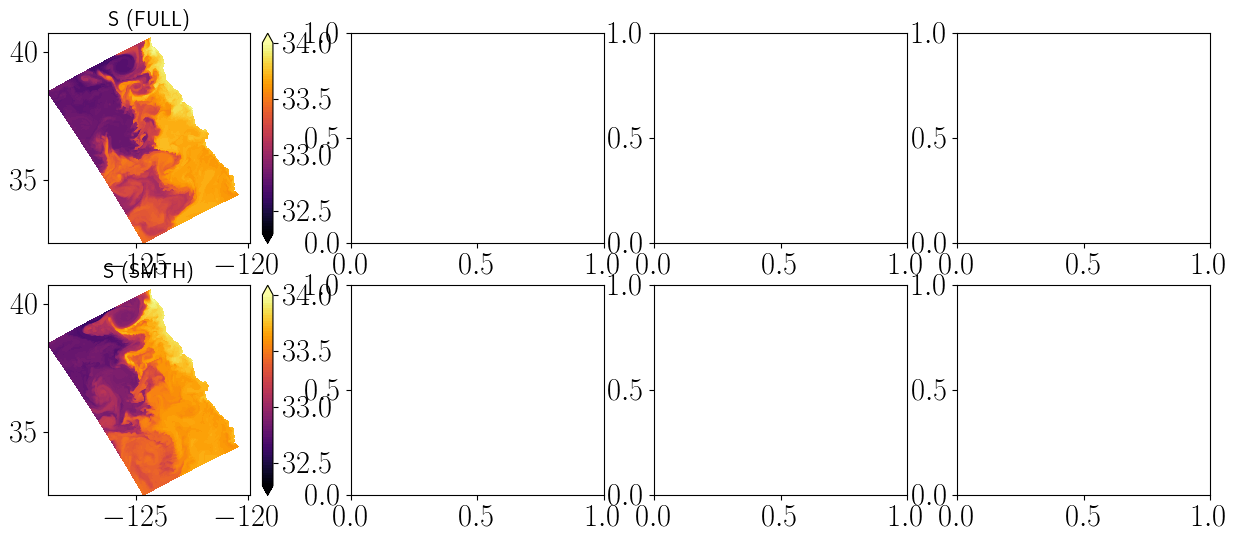

In [71]:
for ixx in range(sf.shape[0]):

    fig,ax=plt.subplots(2,4,figsize=(15,6))
    ax=ax.ravel()
    cc1=ax[0].contourf(sf.nav_lon_rho,sf.nav_lat_rho,sf[ixx],cmap='inferno',levels=np.linspace(32.3,34,75),extend='both')


    cb1=fig.colorbar(cc1, ax=ax[0])
    cb1.set_ticks([32.5,33,33.5,34])

    ax[0].set_title(r'S (FULL)',fontsize=15)



    cc2=ax[4].contourf(st.nav_lon_rho,st.nav_lat_rho,st[ixx],cmap='inferno',levels=np.linspace(32.3,34,75),extend='both')

    cb2=fig.colorbar(cc2, ax=ax[4])
    cb2.set_ticks([32.5,33,33.5,34])
    ax[4].set_title(r'S (SMTH)',fontsize=15)



    cc3=ax[1].contourf(rain_f.nav_lon,rain_f.nav_lat,rain_f[ixx],cmap='viridis',extend='both')


    cb3=fig.colorbar(cc3, ax=ax[1])
    # cb3.set_ticks([24.5,25.5,26.5])
    ax[1].set_title('P [mm]',fontsize=15)




    cc4=ax[5].contourf(rain_t.nav_lon,rain_t.nav_lat,rain_t[ixx],cmap='viridis',extend='both')

    cb4=fig.colorbar(cc4, ax=ax[5])
    ax[5].set_title('P [mm]',fontsize=15)





    cc5=ax[2].contourf(tf.nav_lon_rho,tf.nav_lat_rho,tf[ixx],cmap='rainbow',levels=np.linspace(9,15,75),extend='both')

    cb5=fig.colorbar(cc5, ax=ax[2])
    cb5.set_ticks([9,10,11,12,13])

    ax[2].set_title(r'T [C] (FULL)',fontsize=15)



    cc6=ax[6].contourf(tt.nav_lon_rho,tt.nav_lat_rho,tt[ixx],cmap='rainbow',levels=np.linspace(9,15,75),extend='both')
    cb6=fig.colorbar(cc6, ax=ax[6])
    cb6.set_ticks([9,10,11,12,13])
    ax[6].set_title(r'T [C](SMTH)',fontsize=15)



    cc7=ax[3].contourf(LH_f.nav_lon,LH_f.nav_lat,LH_f[ixx],levels=np.linspace(-150,150,75),cmap='seismic',extend='both')


    cb7=fig.colorbar(cc7, ax=ax[3])
    cb7.set_ticks([-100,-50,0,50,100])


    # cb3.set_ticks([24.5,25.5,26.5])
    ax[3].set_title(r'LH [W m$^{-2}$]',fontsize=15)




    cc8=ax[7].contourf(LH_t.nav_lon,LH_t.nav_lat,LH_t[ixx],levels=np.linspace(-150,150,75),cmap='seismic',extend='both')

    cb8=fig.colorbar(cc8, ax=ax[7])
    cb8.set_ticks([-100,-50,0,50,100])


    # cb4.set_ticks([0,0.5,1])
    ax[7].set_title(r'LH [W m$^{-2}$]',fontsize=15)



    ax[0].text(-126,30.4,'{0}'.format(t_ind[ixx].data),fontsize=10)
    plt.tight_layout()
    plt.savefig('/homes/metogra/iufarias/Documents/figures/smode_help/S_T_P_LH/salt+precipitation_maps_{0:03}.png'.format(ixx))
    plt.close()
